In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
print("Complete import")

Complete import


Load data

In [2]:
cols = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']
insurance = pd.read_csv('./Data/insurance.csv', names=cols)
print(insurance.shape)
insurance.head()

(1339, 7)


,age,sex,bmi,children,smoker,region,expenses
0,age,sex,bmi,children,smoker,region,expenses
1,19,female,27.9,0,yes,southwest,16884.92
2,18,male,33.8,1,no,southeast,1725.55
3,28,male,33.0,3,no,southeast,4449.46
4,33,male,22.7,0,no,northwest,21984.47


In [3]:
insurance.describe()
insurance.dtypes
print(np.unique(insurance.values))

['0' '1' '10043.25' ... 'southeast' 'southwest' 'yes']


In [4]:
from sklearn import preprocessing
cleanup_nums = {"sex":     {"female": 0, "male": 1},
                "smoker": {"no": 0, "yes": 1},
                "region": {'northeast': 0, 'southeast': 1,'southwest' : 2, 'northwest': 3}}
insurance = insurance.replace(cleanup_nums)
insurance.head()

              

,age,sex,bmi,children,smoker,region,expenses
0,age,sex,bmi,children,smoker,region,expenses
1,19,0,27.9,0,1,2,16884.92
2,18,1,33.8,1,0,1,1725.55
3,28,1,33.0,3,0,1,4449.46
4,33,1,22.7,0,0,3,21984.47


In [5]:
insurance["sex"] = pd.to_numeric(insurance.sex, errors='coerce')
insurance["age"] = pd.to_numeric(insurance.age, errors='coerce')
insurance["bmi"] = pd.to_numeric(insurance.bmi, errors='coerce')
insurance["children"] = pd.to_numeric(insurance.children, errors='coerce')
insurance["smoker"] = pd.to_numeric(insurance.smoker, errors='coerce')
insurance["region"] = pd.to_numeric(insurance.region, errors='coerce')
insurance["expenses"] = pd.to_numeric(insurance.expenses, errors='coerce')

In [6]:
insurance = insurance.dropna()
insurance.shape

(1338, 7)

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

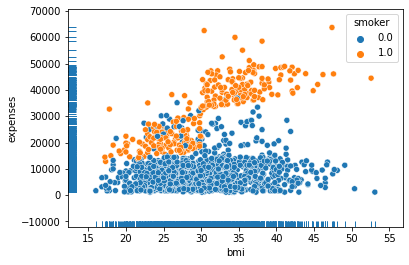

In [8]:
sns.scatterplot(x=insurance['bmi'], y=insurance['expenses'], hue=insurance['smoker'])
sns.rugplot(x=insurance['bmi'], y=insurance['expenses'])


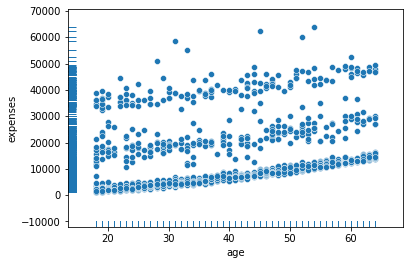

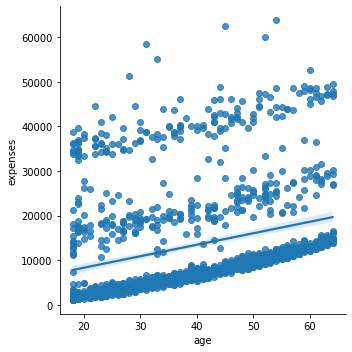

In [9]:
sns.scatterplot(x=insurance['age'], y=insurance['expenses'])
sns.rugplot(x=insurance['age'], y=insurance['expenses'])
sns.lmplot(x="age", y="expenses", data=insurance)

<AxesSubplot:xlabel='children', ylabel='expenses'>

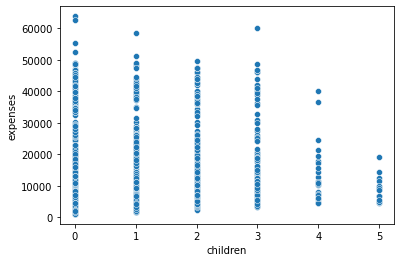

In [10]:
sns.scatterplot(x = insurance['children'], y = insurance['expenses'])


<AxesSubplot:xlabel='region', ylabel='expenses'>

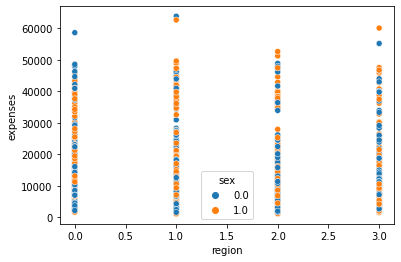

In [15]:
sns.scatterplot(x = insurance['region'], y = insurance['expenses'], hue = insurance['sex'])
# sns.scatterplot(x = insurance['region'], y = insurance['expenses'])


In [11]:
insurance.dtypes

age         float64
sex         float64
bmi         float64
children    float64
smoker      float64
region      float64
expenses    float64
dtype: object

**Normallize**

In [12]:
insurance

,age,sex,bmi,children,smoker,region,expenses
1,19.0,0.0,27.9,0.0,1.0,2.0,16884.92
2,18.0,1.0,33.8,1.0,0.0,1.0,1725.55
3,28.0,1.0,33.0,3.0,0.0,1.0,4449.46
4,33.0,1.0,22.7,0.0,0.0,3.0,21984.47
5,32.0,1.0,28.9,0.0,0.0,3.0,3866.86
...,...,...,...,...,...,...,...
1334,50.0,1.0,31.0,3.0,0.0,3.0,10600.55
1335,18.0,0.0,31.9,0.0,0.0,0.0,2205.98
1336,18.0,0.0,36.9,0.0,0.0,1.0,1629.83
1337,21.0,0.0,25.8,0.0,0.0,2.0,2007.95


In [9]:
data_normalize=(insurance-insurance.min())/(insurance.max()-insurance.min())
data_normalize.expenses = data_normalize.expenses*(insurance.expenses.max()-insurance.expenses.min())+insurance.expenses.min()
data_normalize

,age,sex,bmi,children,smoker,region,expenses
1,0.021739,0.0,0.320755,0.0,1.0,0.666667,16884.92
2,0.000000,1.0,0.479784,0.2,0.0,0.333333,1725.55
3,0.217391,1.0,0.458221,0.6,0.0,0.333333,4449.46
4,0.326087,1.0,0.180593,0.0,0.0,1.000000,21984.47
5,0.304348,1.0,0.347709,0.0,0.0,1.000000,3866.86
...,...,...,...,...,...,...,...
1334,0.695652,1.0,0.404313,0.6,0.0,1.000000,10600.55
1335,0.000000,0.0,0.428571,0.0,0.0,0.000000,2205.98
1336,0.000000,0.0,0.563342,0.0,0.0,0.333333,1629.83
1337,0.065217,0.0,0.264151,0.0,0.0,0.666667,2007.95


In [36]:
feature_cols = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
feature_cols2 = ['age', 'bmi', 'children', 'smoker']
X = data_normalize[feature_cols]
y = data_normalize['expenses']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train)
print(y_train)
A = data_normalize[feature_cols2]
b = data_normalize['expenses']
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.33, random_state=42)

           age  sex       bmi  children  smoker    region
1047  0.543478  0.0  0.245283       0.0     0.0  0.000000
683   0.456522  1.0  0.520216       0.4     1.0  0.666667
1038  0.586957  0.0  0.390836       0.2     1.0  1.000000
491   0.021739  0.0  0.455526       0.0     0.0  0.666667
40    0.913043  1.0  0.644205       0.0     1.0  0.666667
...        ...  ...       ...       ...     ...       ...
1096  0.000000  0.0  0.415094       0.8     0.0  0.000000
1131  0.456522  0.0  0.212938       1.0     0.0  0.333333
1295  0.869565  1.0  0.247978       0.0     0.0  0.000000
861   0.413043  0.0  0.851752       0.4     1.0  0.666667
1127  0.804348  1.0  0.374663       0.0     0.0  0.666667

[896 rows x 6 columns]
1047     7325.05
683     40103.89
1038    39725.52
491      1748.77
40      48173.36
          ...   
1096     4561.19
1131     8582.30
1295    11931.13
861     46113.51
1127    10214.64
Name: expenses, Length: 896, dtype: float64


 k = 1 Mean Squared Error =  53065763.04598145
 k = 2 Mean Squared Error =  38429920.87057336
 k = 3 Mean Squared Error =  35770129.417896725
 k = 4 Mean Squared Error =  34116611.11749678
 k = 5 Mean Squared Error =  31823845.88272604
 k = 6 Mean Squared Error =  31670868.097830456
 k = 7 Mean Squared Error =  31533111.452649564
 k = 8 Mean Squared Error =  31383894.99210778
 k = 9 Mean Squared Error =  31368182.908007868
 k = 10 Mean Squared Error =  31377586.388637327
 k = 11 Mean Squared Error =  31282387.833133336
 k = 12 Mean Squared Error =  31402480.416546997
 k = 13 Mean Squared Error =  31301859.59992273
 k = 14 Mean Squared Error =  31347428.763758257
 k = 15 Mean Squared Error =  31420215.418548755
 k = 16 Mean Squared Error =  31253850.740581524
 k = 17 Mean Squared Error =  31356729.901576087
 k = 18 Mean Squared Error =  31766588.415531423
 k = 19 Mean Squared Error =  31829451.20101201
 k = 20 Mean Squared Error =  31928735.85852446


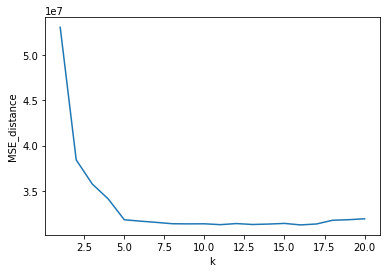

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

distance_6 = []
from sklearn.neighbors import KNeighborsRegressor
for i in range(20):
    knn_model = KNeighborsRegressor(n_neighbors=i+1, weights='distance').fit(X_train, y_train)
    predicted_values = knn_model.predict(X_test)
    predict_df = pd.DataFrame({"Dependent_Test" : y_test, "Dependent_Predicted" : predicted_values})
    mse_knn_distance = mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test)
    print(" k = " + str(i+1) + " Mean Squared Error = ", mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
    distance_6.append(mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.plot(x ,distance_6)
plt.xlabel("k")
plt.ylabel('MSE_distance')
plt.show()


 k = 1 Mean Squared Error =  53065763.04598145
 k = 2 Mean Squared Error =  38042367.78250453
 k = 3 Mean Squared Error =  35908526.68004528
 k = 4 Mean Squared Error =  34227834.6576583
 k = 5 Mean Squared Error =  31498814.653729822
 k = 6 Mean Squared Error =  32205517.321283486
 k = 7 Mean Squared Error =  32389665.124796905
 k = 8 Mean Squared Error =  32093291.800788414
 k = 9 Mean Squared Error =  32430243.773172826
 k = 10 Mean Squared Error =  32309616.414366696
 k = 11 Mean Squared Error =  32210565.310166385
 k = 12 Mean Squared Error =  32446630.906307306
 k = 13 Mean Squared Error =  32212489.327658597
 k = 14 Mean Squared Error =  32303028.774224553
 k = 15 Mean Squared Error =  32618688.03220302
 k = 16 Mean Squared Error =  32293774.193567988
 k = 17 Mean Squared Error =  32534336.981490456
 k = 18 Mean Squared Error =  33129731.37463589
 k = 19 Mean Squared Error =  33223732.84940244
 k = 20 Mean Squared Error =  33438046.914222553


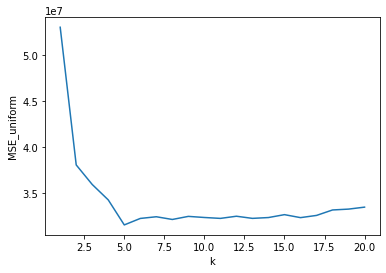

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
uniform_6 = []


from sklearn.neighbors import KNeighborsRegressor
for i in range(20):
    knn_model = KNeighborsRegressor(n_neighbors=i+1, weights='uniform').fit(X_train, y_train)
    predicted_values = knn_model.predict(X_test)
    predict_df = pd.DataFrame({"Dependent_Test" : y_test, "Dependent_Predicted" : predicted_values})
    print(" k = " + str(i+1) + " Mean Squared Error = ", mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
    uniform_6.append(mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
    
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

plt.plot(x,uniform_6)
plt.xlabel("k")
plt.ylabel('MSE_uniform')
plt.show()


 k = 1 Mean Squared Error =  42966147.374798425
 k = 2 Mean Squared Error =  31456952.805083945
 k = 3 Mean Squared Error =  28335028.269093253
 k = 4 Mean Squared Error =  26588135.771195214
 k = 5 Mean Squared Error =  26001850.826447878
 k = 6 Mean Squared Error =  25848051.5344593
 k = 7 Mean Squared Error =  25137882.56307059
 k = 8 Mean Squared Error =  24899453.191375274
 k = 9 Mean Squared Error =  24582662.90734936
 k = 10 Mean Squared Error =  24618946.95811105
 k = 11 Mean Squared Error =  24458890.013869867
 k = 12 Mean Squared Error =  24430031.382659487
 k = 13 Mean Squared Error =  24179882.426813014
 k = 14 Mean Squared Error =  23955754.108113762
 k = 15 Mean Squared Error =  23898941.25042891
 k = 16 Mean Squared Error =  23904834.96187178
 k = 17 Mean Squared Error =  24032634.13542718
 k = 18 Mean Squared Error =  23983899.1340055
 k = 19 Mean Squared Error =  24080275.47202944
 k = 20 Mean Squared Error =  24002919.38014114


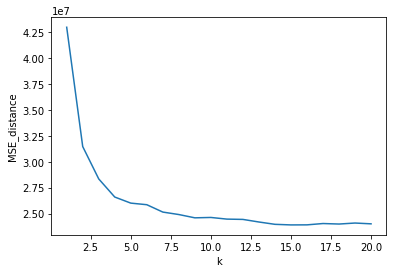

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

distance_4 = []
from sklearn.neighbors import KNeighborsRegressor
for i in range(20):
    knn_model = KNeighborsRegressor(n_neighbors=i+1, weights='distance').fit(A_train, b_train)
    predicted_values = knn_model.predict(A_test)
    predict_df = pd.DataFrame({"Dependent_Test" : b_test, "Dependent_Predicted" : predicted_values})
    mse_knn_distance = mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test)
    print(" k = " + str(i+1) + " Mean Squared Error = ", mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
    distance_4.append(mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.plot(x ,distance_4)
plt.xlabel("k")
plt.ylabel('MSE_distance')
plt.show()


 k = 1 Mean Squared Error =  42966147.374798425
 k = 2 Mean Squared Error =  29802462.66425283
 k = 3 Mean Squared Error =  25803304.49767346
 k = 4 Mean Squared Error =  23885211.498218443
 k = 5 Mean Squared Error =  23732160.891487308
 k = 6 Mean Squared Error =  23757894.83487377
 k = 7 Mean Squared Error =  22941220.31757769
 k = 8 Mean Squared Error =  22872956.255037315
 k = 9 Mean Squared Error =  22563636.83950542
 k = 10 Mean Squared Error =  22927044.7107482
 k = 11 Mean Squared Error =  22925340.233753882
 k = 12 Mean Squared Error =  23000482.69025216
 k = 13 Mean Squared Error =  22743449.677037954
 k = 14 Mean Squared Error =  22433908.27040664
 k = 15 Mean Squared Error =  22300507.74324033
 k = 16 Mean Squared Error =  22488718.75538853
 k = 17 Mean Squared Error =  22781727.77394549
 k = 18 Mean Squared Error =  22858971.148191314
 k = 19 Mean Squared Error =  23086472.617892347
 k = 20 Mean Squared Error =  22876874.50383933


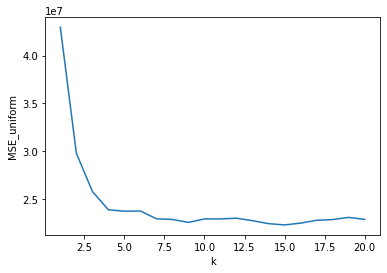

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
uniform_4 = []


from sklearn.neighbors import KNeighborsRegressor
for i in range(20):
    knn_model = KNeighborsRegressor(n_neighbors=i+1, weights='uniform').fit(A_train, b_train)
    predicted_values = knn_model.predict(A_test)
    predict_df = pd.DataFrame({"Dependent_Test" : b_test, "Dependent_Predicted" : predicted_values})
    print(" k = " + str(i+1) + " Mean Squared Error = ", mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
    uniform_4.append(mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
    
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

plt.plot(x,uniform_4)
plt.xlabel("k")
plt.ylabel('MSE_uniform')
plt.show()


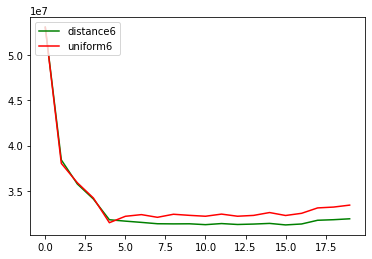

In [44]:
fig, ax = plt.subplots()

ax.plot(distance_6, color = 'green', label = 'distance6')
ax.plot(uniform_6 , color = 'red', label = 'uniform6')

ax.legend(loc = 'upper left')
plt.show()

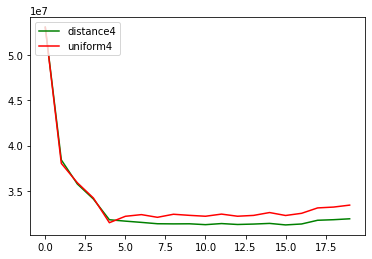

In [45]:
fig, ax = plt.subplots()

ax.plot(distance_6, color = 'green', label = 'distance4')
ax.plot(uniform_6 , color = 'red', label = 'uniform4')

ax.legend(loc = 'upper left')
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
check = reg.predict(X_test)
mse_linear_6 = np.mean(np.square(y_test - check))
mse_linear_6

35346221.74168071

In [30]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(A_train, b_train)
check = reg.predict(A_test)
mse_linear_4 = np.mean(np.square(b_test - check))
mse_linear_4

35297252.52263133

In [21]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(X_train)
scaled_y = y_train.T

def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]

    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    episode_list = []

    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2 / total_samples) * (X.T.dot(y_true - y_predicted))
        b_grad = -(2 / total_samples) * np.sum(y_true - y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true - y_predicted))

        if i % 100 == 0:
            cost_list.append(cost)
            episode_list.append(i)

    return w, b, cost, cost_list, episode_list


w, b, cost, cost_list, episode_list = batch_gradient_descent(scaled_X, scaled_y.T, 10000)



In [22]:
cost_list

[325449302.2497155,
 89359971.8728989,
 66779612.400212236,
 54776569.77485657,
 48245622.81303139,
 44589814.56283283,
 42467064.80177082,
 41177889.5577855,
 40353679.74664391,
 39797347.38520874,
 39401488.79323437,
 39106125.82020088,
 38876733.34930394,
 38692712.07389244,
 38541269.60747129,
 38414122.04198795,
 38305680.24698027,
 38212027.50190394,
 38130325.77128654,
 38058459.019894935,
 37994811.010438636,
 37938121.7427806,
 37887391.46360863,
 37841814.493637554,
 37800732.41079323,
 37763600.21148816,
 37729961.42289124,
 37699429.535696395,
 37671673.98541494,
 37646409.45656587,
 37623387.64346473,
 37602390.84469276,
 37583226.93733196,
 37565725.39679379,
 37549734.11425491,
 37535116.82649517,
 37521751.01908506,
 37509526.19802878,
 37498342.45038739,
 37488109.23339808,
 37478744.34584645,
 37470173.04615895,
 37462327.289761595,
 37455145.06436335,
 37448569.80646007,
 37442549.88588716,
 37437038.147948146,
 37431991.50471862,
 37427370.568723805,
 37423139.32342

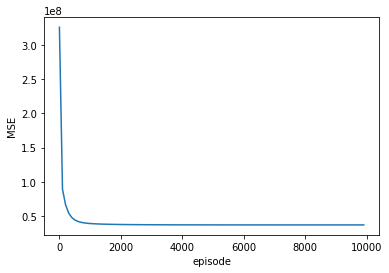

In [23]:
plt.xlabel("episode")
plt.ylabel("MSE")
plt.plot(episode_list, cost_list
         )


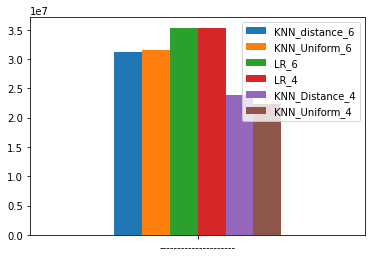

In [46]:

KNN_Distance_6 = [min(distance_6)]
KNN_Uniform_6 = [min(uniform_6)]
LR_6 = [mse_linear_6]
LR_4 = [mse_linear_4]
KNN_Distance_4 = [min(distance_4)]
KNN_Uniform_4 = [min(uniform_4)]
index = ['---------------------']
df = pd.DataFrame({'KNN_distance_6': KNN_Distance_6,
                   'KNN_Uniform_6': KNN_Uniform_6,
                   'LR_6': LR_6,
                   'LR_4': LR_4,
                   'KNN_Distance_4': KNN_Distance_4,
                   'KNN_Uniform_4': KNN_Uniform_4
                   }, index=index)
ax = df.plot.bar(rot=0)

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns
import pandas as pd

x = []
clf = LocalOutlierFactor(n_neighbors=50, contamination=0.02)


X = np.array(X)
y = np.array(y)
print(X)
print(y)
# y_pred = clf.fit_predict(x)
# j = []
# mc = []
# lb = []
# for i in range(len(y_pred)):
#   if y_pred[i]==-1:
#     print(i)


[[0.02173913 0.         0.32075472 0.         1.         0.66666667]
 [0.         1.         0.47978437 0.2        0.         0.33333333]
 [0.2173913  1.         0.45822102 0.6        0.         0.33333333]
 ...
 [0.         0.         0.56334232 0.         0.         0.33333333]
 [0.06521739 0.         0.26415094 0.         0.         0.66666667]
 [0.93478261 0.         0.35309973 0.         1.         1.        ]]
[16884.92  1725.55  4449.46 ...  1629.83  2007.95 29141.36]


In [48]:


#define response variable
y = y

#define explanatory variable
x = X

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit() 
print((model.outlier_test())[0])

[-1.44101831  0.14981489  1.        ]


In [49]:
#suppress scientific notation
import numpy as np
np.set_printoptions(suppress=True)

#create instance of influence
influence = model.get_influence()

#obtain Cook's distance for each observation
cooks = influence.cooks_distance

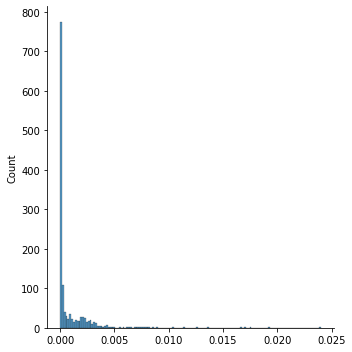

In [50]:
import seaborn as sns
sns.displot(cooks[0])

In [51]:
#display Cook's distances
j = 0
noise = []
k = []
for i in range(len(cooks[1])):
  if (cooks[0][i] > 0.004):
    j = j + 1
    noise.append(i)
    print(i)
print("________________")
print((j))

3
9
34
62
98
99
102
115
140
219
242
250
289
321
380
387
412
430
468
488
516
520
526
543
573
577
587
599
696
806
819
936
959
980
987
994
1008
1012
1019
1027
1039
1047
1085
1100
1142
1146
1195
1206
1230
1258
1300
1317
1328
________________
53


In [52]:
newX = X
newy = y
for i in range(len(noise)):
  newX = np.delete(newX, noise[len(noise)-i-1], 0)
  newy = np.delete(newy, noise[len(noise)-i-1], 0)

In [53]:
from sklearn.model_selection import train_test_split
newX_train, newX_test, newy_train, newy_test = train_test_split(newX, newy, test_size=0.33, random_state=42)

 k = 1 Mean Squared Error =  27509197.59391859
 k = 2 Mean Squared Error =  19607507.40527329
 k = 3 Mean Squared Error =  18184396.119649448
 k = 4 Mean Squared Error =  17113755.80224283
 k = 5 Mean Squared Error =  16560297.35620579
 k = 6 Mean Squared Error =  16617341.338621765
 k = 7 Mean Squared Error =  16822263.646140825
 k = 8 Mean Squared Error =  17164649.988064136
 k = 9 Mean Squared Error =  17369598.988144666
 k = 10 Mean Squared Error =  17891998.443641096
 k = 11 Mean Squared Error =  18134127.70192576
 k = 12 Mean Squared Error =  18394154.42243535
 k = 13 Mean Squared Error =  18460199.17629104
 k = 14 Mean Squared Error =  18588864.273928933
 k = 15 Mean Squared Error =  19056067.008071378
 k = 16 Mean Squared Error =  19189809.2581382
 k = 17 Mean Squared Error =  19536843.863540076
 k = 18 Mean Squared Error =  19864809.565296527
 k = 19 Mean Squared Error =  19990946.20889582
 k = 20 Mean Squared Error =  20111029.457769558


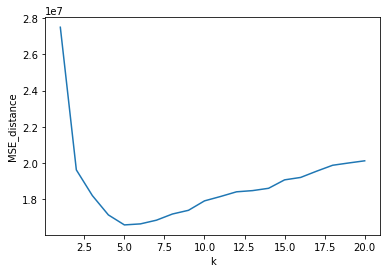

In [54]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

distance = []
from sklearn.neighbors import KNeighborsRegressor
for i in range(20):
    knn_model = KNeighborsRegressor(n_neighbors=i+1, weights='distance').fit(newX_train, newy_train)
    predicted_values = knn_model.predict(newX_test)
    predict_df = pd.DataFrame({"Dependent_Test" : newy_test, "Dependent_Predicted" : predicted_values})
    print(" k = " + str(i+1) + " Mean Squared Error = ", mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
    distance.append(mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.plot(x ,distance)
plt.xlabel("k")
plt.ylabel('MSE_distance')
plt.show()


 k = 1 Mean Squared Error =  27509197.59391859
 k = 2 Mean Squared Error =  20898900.441657532
 k = 3 Mean Squared Error =  19882252.723972626
 k = 4 Mean Squared Error =  18864625.511320747
 k = 5 Mean Squared Error =  18866170.713416085
 k = 6 Mean Squared Error =  19300702.875117067
 k = 7 Mean Squared Error =  19799125.41143692
 k = 8 Mean Squared Error =  20608438.655825343
 k = 9 Mean Squared Error =  20835210.048196852
 k = 10 Mean Squared Error =  21549750.33963354
 k = 11 Mean Squared Error =  21627444.9045925
 k = 12 Mean Squared Error =  21937542.94280655
 k = 13 Mean Squared Error =  21817878.451575663
 k = 14 Mean Squared Error =  21931223.33278027
 k = 15 Mean Squared Error =  22652959.89948988
 k = 16 Mean Squared Error =  22709752.28646173
 k = 17 Mean Squared Error =  23091986.243933335
 k = 18 Mean Squared Error =  23483986.385651648
 k = 19 Mean Squared Error =  23512625.561753575
 k = 20 Mean Squared Error =  23624242.634456914


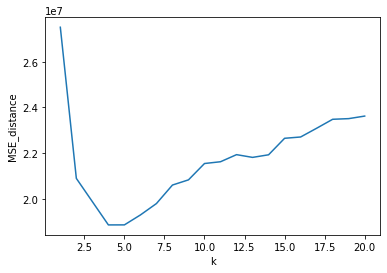

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

uniform = []
from sklearn.neighbors import KNeighborsRegressor
for i in range(20):
    knn_model = KNeighborsRegressor(n_neighbors=i+1, weights='uniform').fit(newX_train, newy_train)
    predicted_values = knn_model.predict(newX_test)
    predict_df = pd.DataFrame({"Dependent_Test" : newy_test, "Dependent_Predicted" : predicted_values})
    print(" k = " + str(i+1) + " Mean Squared Error = ", mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
    uniform.append(mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.plot(x ,uniform)
plt.xlabel("k")
plt.ylabel('MSE_distance')
plt.show()


In [57]:
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import train_test_split

reg = LinearRegression().fit(newX_train, newy_train)
check = reg.predict(newX_test)
mse = np.mean(np.square(newy_test - check))
mse

23219097.832243573

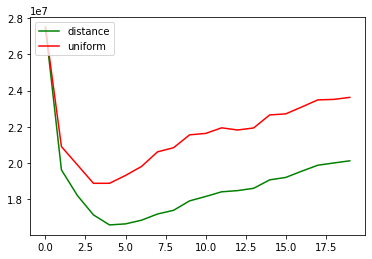

In [58]:
fig, ax = plt.subplots()

ax.plot(distance, color = 'green', label = 'distance')
ax.plot(uniform , color = 'red', label = 'uniform')
# ax.plot(myweightt , color = 'blue', label = 'myweight')
ax.legend(loc = 'upper left')
plt.show()